<a href="https://colab.research.google.com/github/jay-thakur/Concept_of_Overfitting/blob/main/Concept_of_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression** is used to predict a continuous value. Some of the commons Regression techniques are - 

Simple Linear Regression

Multiple Linear Regression

Polynomial Linear Regression

Now let's understand **what is Overfitting** briefly.

Let's suppose we have a created a model & we want to check how well our model works on unseen data. Sometimes our model performs poor due to **Overfitting** or **underfitting**. 

When a model gives high accuracy on train dataset but performs poor on unseen dataset, then we call it as Overfitted model. 

In this article, we will learn Overfitting Concept with Linear Regression with Polynomial Features.

So let's start.


In [260]:
# Let's load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# Linear Regression with Polynomial Features

we will create 20 random uniform distributed values & then we will use sin function to predict. we will work on **[0, 1, 3, 9]** order linear regression 

In [261]:
np.random.seed(2)

n_samples = 20

# uniform distribution
X = np.sort(np.random.uniform(0, 1, n_samples))
print(X)

# Sample N from the normal gaussian distribution 
N = np.random.normal(0, 1)
print(N)

[0.02592623 0.07964548 0.13457995 0.18443987 0.20464863 0.26682728
 0.29965467 0.33033482 0.4203678  0.43532239 0.4359949  0.49423684
 0.51357812 0.52914209 0.54966248 0.61927097 0.62113383 0.78533515
 0.84656149 0.85397529]
-0.7478709492938624


In [262]:
def true_func(X):
  return np.sin(2*np.pi*X)

In [263]:
y = true_func(X) + N * 0.1
print(y)

[ 0.08739272  0.40501338  0.67357598  0.84156412  0.88488832  0.91962881
  0.87693767  0.80050416  0.40494018  0.32050093  0.31661605 -0.03858399
 -0.15999749 -0.25687081 -0.38178648 -0.75598788 -0.76451002 -1.05024233
 -0.89631329 -0.86887186]


Now we our dataset X, y, let's draw it.

[]

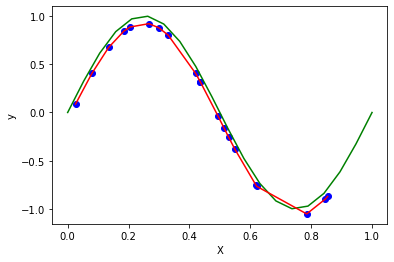

In [264]:
# lets draw our graph
x_sin = np.linspace(0, 1, 20).reshape((-1,1))
plt.plot(x_sin, true_func(x_sin), color='green')
plt.scatter(X, y, color='blue')
plt.plot(X, y, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.plot()

Let's divide our dataset into **train** & **test** dataset using **sklearn**

In [265]:
# let's divide the dataset into train & test dataset
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.5)

In [266]:
# a function to plot the graph
def show_plot(degree, X_train, y_train, X_test, preds):
  plt.scatter(X_train, y_train)
  plt.plot(x_sin, true_func(x_sin), color='green')
  plt.plot(X_test, preds, color='m')
  plt.title('When order, M='+degree)
  plt.xlabel('X')
  plt.ylabel('y=sin(2*pi*X)+N')
  plt.xlim((0, 1))
  plt.ylim((-1, 1))
  plt.show()


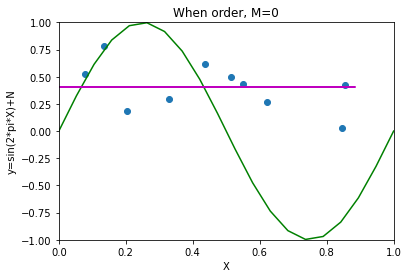

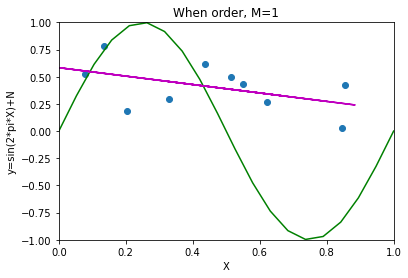

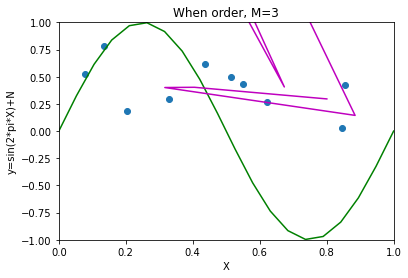

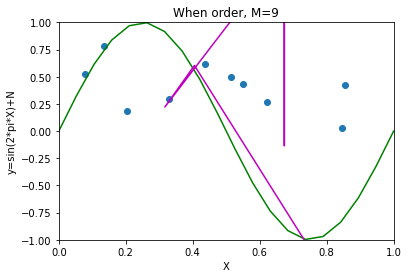

In [267]:
degrees = [0, 1, 3, 9]
coefs_list = {}
for i in range(len(degrees)):
  # print(i)
  d = str(degrees[i])
  pipeline = make_pipeline(PolynomialFeatures(degrees[i]), LinearRegression())
  pipeline.fit(X_train[:, np.newaxis], y_train)
  preds = pipeline.predict(X_test[:, np.newaxis])
  coefs = np.polyfit(X_train, y_train, degrees[i])

  M = 'M'+ d
  # print(M)
  coefs_list[M] = coefs
  # print(weights)
  show_plot(d, X_train, y_train, X_test, preds)

Now let's display weights in a tabular form

## Displaying weights in Table 

In [268]:
coefs_list

{'M0': array([0.40605233]),
 'M1': array([-0.3874399 ,  0.58311682]),
 'M3': array([-4.51586567,  6.26286736, -2.72181609,  0.77791365]),
 'M9': array([-7.87077921e+04,  3.23565853e+05, -5.55077613e+05,  5.14915098e+05,
        -2.79048362e+05,  8.85910169e+04, -1.54530554e+04,  1.21936341e+03,
        -1.51869276e+01, -9.80106375e-01])}

In [269]:
M0_list = ["", "", "", "", "", "", "", "", ""]
M1_list = ["", "", "", "", "", "", "", ""]
M3_list = ["", "", "", "", "", ""]
M9_list = []

def append_list(coefs_list, degree, M, M_list):
  for i in range(0, degree+1):
    M_list.insert(i, coefs_list[M][i])

append_list(coefs_list, 0, 'M0', M0_list)
append_list(coefs_list, 1, 'M1', M1_list)
append_list(coefs_list, 3, 'M3', M3_list)
append_list(coefs_list, 9, 'M9', M9_list)

weights = {'M = 0': M0_list, 'M = 1': M1_list, 'M = 3': M3_list, 'M = 9': M9_list}
indexes = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']

weights_df = pd.DataFrame(weights, index=indexes)
weights_df

,M = 0,M = 1,M = 3,M = 9
w0,0.406052,-0.38744,-4.51587,-78707.792144
w1,,0.583117,6.26287,323565.852552
w2,,,-2.72182,-555077.613480
w3,,,0.777914,514915.098324
w4,,,,-279048.361697
w5,,,,88591.016915
w6,,,,-15453.055368
w7,,,,1219.363410
w8,,,,-15.186928
w9,,,,-0.980106


Let's calculate the train & test error

## Train Error vs Test Error

In [270]:
# Train & Test error
train_error = []
test_error = []

for i in range(0, 9):
  pipeline = make_pipeline(PolynomialFeatures(degree=i),LinearRegression())
  pipeline.fit(X_train[:, np.newaxis], y_train)

  train_preds = pipeline.predict(X_train[:, np.newaxis])
  train_loss = np.sqrt(mean_squared_error(y_train, train_preds))
  train_error.append(train_loss)

  test_preds = pipeline.predict(X_test[:, np.newaxis])
  test_loss = np.sqrt(mean_squared_error(y_test, test_preds))
  test_error.append(test_loss)

print(train_error)
print(test_error)

[0.20919343238921037, 0.18340012533675615, 0.1828149286781175, 0.17715106007589326, 0.16342891510913232, 0.11495355955734601, 0.1111813784270832, 0.00937797415645809, 0.0057441602717234344]
[0.6994518326893504, 0.7854512891218851, 0.736370595736925, 5.575664382394466, 68.53774141619742, 769.7972512422322, 2225.925768797124, 33324.07924443519, 15045.646675728107]


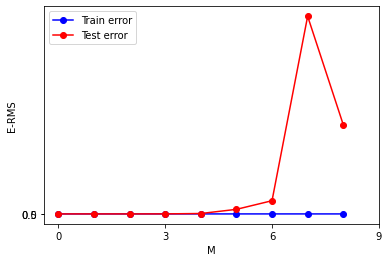

In [271]:
# let's plot the train & test error
plt.plot(train_error, label="Train error", marker='o', color='blue')
plt.plot(test_error, label="Test error", marker='o', color='red')

x_ticks = np.arange(0, 10, 3)
plt.xticks(x_ticks)

y_ticks = np.arange(0, 1, 0.5)
plt.yticks(y_ticks)

plt.xlabel("M")
plt.ylabel("E-RMS")

plt.legend(loc="best")

plt.show()

we can see the train & test error through this graph.

Let's add some more data & see how does it work

### Now generate 100 more data and fit 9th order model and draw fit

In [272]:
# uniform distribution
new_samples = 120
X_new = np.sort(np.random.uniform(0, 1, new_samples))
# X_new = np.sort(np.random.uniform(0, 1, new_samples))[:, np.newaxis]
# print(X_new)

# Sample N from the normal gaussian distribution 
N_new = np.random.normal(0, 1)
# print(N_new)

y_new = np.sin(2*np.pi*X_new) + N_new * 0.1
# print(y_new)

[]

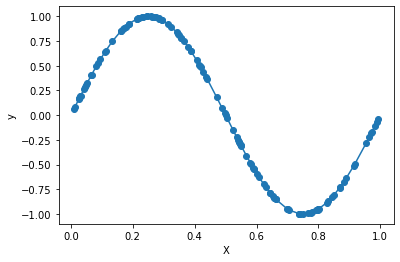

In [273]:
plt.scatter(X_new, y_new)
plt.plot(X_new, y_new)
plt.xlabel("X")
plt.ylabel("y")
plt.plot()

In [274]:
X_train_new, y_train_new, X_test_new, y_test_new = train_test_split(X_new, y_new, test_size=0.5)

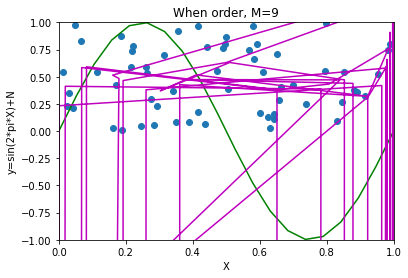

In [275]:
d = 9
pipeline = make_pipeline(PolynomialFeatures(d), LinearRegression())
pipeline.fit(X_train_new[:, np.newaxis], y_train_new)
preds = pipeline.predict(X_test_new[:, np.newaxis])

show_plot(str(d), X_train_new, y_train_new, X_test_new, preds)

# d = 9
# pipeline = make_pipeline(PolynomialFeatures(d), LinearRegression())
# pipeline.fit(X_train_new, y_train_new)
# preds = pipeline.predict(X_test_new)

# show_plot(str(d), X_train_new, y_train_new, X_test_new, preds)

In [276]:
# plt.scatter(X_new, y_new, s=10)
# plt.plot(X_train_new, preds, color='m')
# plt.title('When order,M =9')
# plt.xlabel('X')
# plt.ylabel('y=sin(2*pi*X)+N')
# plt.show()

we can see that it is a very complex model. Test Loss is very high. we can minimize this loss using **Regularization** technique. 

**Regularization** is used to prevent overfitting.

There are many types of regularization. we will use L2 Regularisation also called as **Ridge Regularisation**.

### Now we will regularize using the sum of weights.

we will use L2 Regularisation - Ridge Regression

In [277]:
train_error_ridge = []
test_error_ridge = []

def ridge_regularization(lambda_value):
  d = 9

  pipeline = make_pipeline(PolynomialFeatures(d))
  X_train_new_transformed = pipeline.fit_transform(X_train_new[:, np.newaxis], y_train_new)
  ridge_model = Ridge(alpha=lambda_value)
  ridge_model.fit(X_train_new_transformed, y_train_new)

  y_pred_train_ridge = ridge_model.predict(X_train_new_transformed)
  train_ridge_loss = np.sqrt(mean_squared_error(y_train_new, y_pred_train_ridge))
  train_error_ridge.append(train_ridge_loss)

  X_test_new_transformed = pipeline.fit_transform(X_train_new[:, np.newaxis])
  y_pred_test_ridge = ridge_model.predict(X_test_new_transformed)
  test_ridge_loss = np.sqrt(mean_squared_error(y_test_new, y_pred_test_ridge))
  test_error_ridge.append(test_ridge_loss)
  
  return ridge_model

### Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

In [278]:
def ridge_chart(lambda_value, pred_ridge):
  plt.scatter(X_train_new, y_train_new)
  plt.plot(X_test_new, pred_ridge, label=lambda_value)
  plt.title('When Lambda = '+str(lambda_value))
  plt.legend()

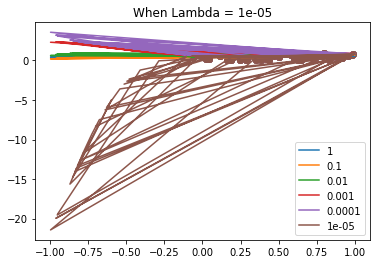

In [279]:
lambda_values = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
for i in range(len(lambda_values)):
  pipeline = make_pipeline(PolynomialFeatures(d))
  X_test_new_transformed = pipeline.fit_transform(X_test_new[:, np.newaxis])
  
  model = ridge_regularization(lambda_values[i])
  pred_ridge = model.predict(X_test_new_transformed)

  ridge_chart(lambda_values[i], pred_ridge)

### Now draw test  and train error according to lamda = 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

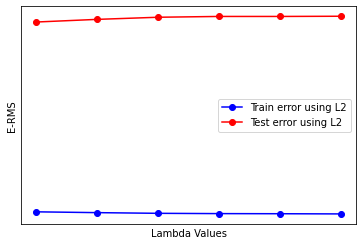

In [280]:
plt.plot(train_error_ridge, label="Train error using L2", marker='o', color='blue')
plt.plot(test_error_ridge, label="Test error using L2", marker='o', color='red')

plt.xticks([])
plt.yticks([])

plt.xlabel("Lambda Values")
plt.ylabel("E-RMS")

plt.legend(loc="best")

plt.show()

### Best Model (According to test performance)

# References

https://medium.datadriveninvestor.com/regression-in-machine-learning-296caae933ec


https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
